In [157]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [158]:
df = pd.read_excel('ML_3673_Cancer_Data_Set_[3676]_(1) (1).xlsx')

In [159]:
df

,Survived,Class,Sex,Age,Bed Cost(£),Hospital,Unnamed: 6,Unnamed: 7
0,0,Gen Population,male,22.0,7.2500,S,NaN,S = Sussex
1,1,Premium,female,38.0,71.2833,C,NaN,C = Devon
2,1,Gen Population,female,26.0,7.9250,S,NaN,Q = Bristol
3,1,Premium,female,35.0,53.1000,S,NaN,NaN
4,0,Gen Population,male,35.0,8.0500,S,NaN,0 = Survived
...,...,...,...,...,...,...,...,...
594,0,Side Ward,male,37.0,26.0000,S,NaN,NaN
595,0,Gen Population,male,36.0,24.1500,S,NaN,NaN
596,1,Side Ward,female,NaN,33.0000,S,NaN,NaN
597,0,Gen Population,male,49.0,0.0000,S,NaN,NaN


In [160]:
df.shape

(599, 8)

In [161]:
df.head()

,Survived,Class,Sex,Age,Bed Cost(£),Hospital,Unnamed: 6,Unnamed: 7
0,0,Gen Population,male,22.0,7.2500,S,NaN,S = Sussex
1,1,Premium,female,38.0,71.2833,C,NaN,C = Devon
2,1,Gen Population,female,26.0,7.9250,S,NaN,Q = Bristol
3,1,Premium,female,35.0,53.1000,S,NaN,NaN
4,0,Gen Population,male,35.0,8.0500,S,NaN,0 = Survived


In [162]:
df.dtypes

Survived         int64
Class           object
Sex             object
Age            float64
Bed Cost(£)    float64
Hospital        object
Unnamed: 6     float64
Unnamed: 7      object
dtype: object

In [163]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
594     True
595    False
596    False
597    False
598    False
Length: 599, dtype: bool

In [164]:
df.isna().sum()

Survived         0
Class            0
Sex              0
Age            121
Bed Cost(£)      0
Hospital         1
Unnamed: 6     599
Unnamed: 7     594
dtype: int64

In [165]:
df.isna().sum().sum()

1315

In [166]:
df.describe()

,Survived,Age,Bed Cost(£),Unnamed: 6
count,599.000000,478.000000,599.000000,0.0
mean,0.392321,30.280335,31.835503,NaN
std,0.488676,14.763718,46.303299,NaN
min,0.000000,1.000000,0.000000,NaN
25%,0.000000,21.000000,7.925000,NaN
50%,0.000000,29.000000,14.500000,NaN
75%,1.000000,38.000000,30.500000,NaN
max,1.000000,82.000000,512.329200,NaN


In [167]:
df.drop_duplicates(inplace=True)

In [168]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
592    False
595    False
596    False
597    False
598    False
Length: 529, dtype: bool

In [169]:
df.drop(["Unnamed: 6", "Unnamed: 7"],axis = 1, inplace = True)


In [170]:
df

,Survived,Class,Sex,Age,Bed Cost(£),Hospital
0,0,Gen Population,male,22.0,7.2500,S
1,1,Premium,female,38.0,71.2833,C
2,1,Gen Population,female,26.0,7.9250,S
3,1,Premium,female,35.0,53.1000,S
4,0,Gen Population,male,35.0,8.0500,S
...,...,...,...,...,...,...
592,0,Gen Population,male,47.0,7.2500,S
595,0,Gen Population,male,36.0,24.1500,S
596,1,Side Ward,female,NaN,33.0000,S
597,0,Gen Population,male,49.0,0.0000,S


In [171]:
df["Age"].fillna(df["Age"].median(),inplace = True)

In [172]:
df['Hospital'].fillna(df['Hospital'].mode()[0], inplace=True)

In [173]:
df.isna().sum().sum()

0

In [174]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Class'] = label_encoder.fit_transform(df['Class'])

df["Bed Cost(£)"] = label_encoder.fit_transform(df['Bed Cost(£)'])
df["Hospital"] = label_encoder.fit_transform(df['Hospital'])


In [175]:
df

,Survived,Class,Sex,Age,Bed Cost(£),Hospital
0,0,0,1,22.0,13,2
1,1,1,0,38.0,174,0
2,1,0,0,26.0,33,2
3,1,1,0,35.0,158,2
4,0,0,1,35.0,35,2
...,...,...,...,...,...,...
592,0,0,1,47.0,13,2
595,0,0,1,36.0,109,2
596,1,2,0,29.0,135,2
597,0,0,1,49.0,0,2


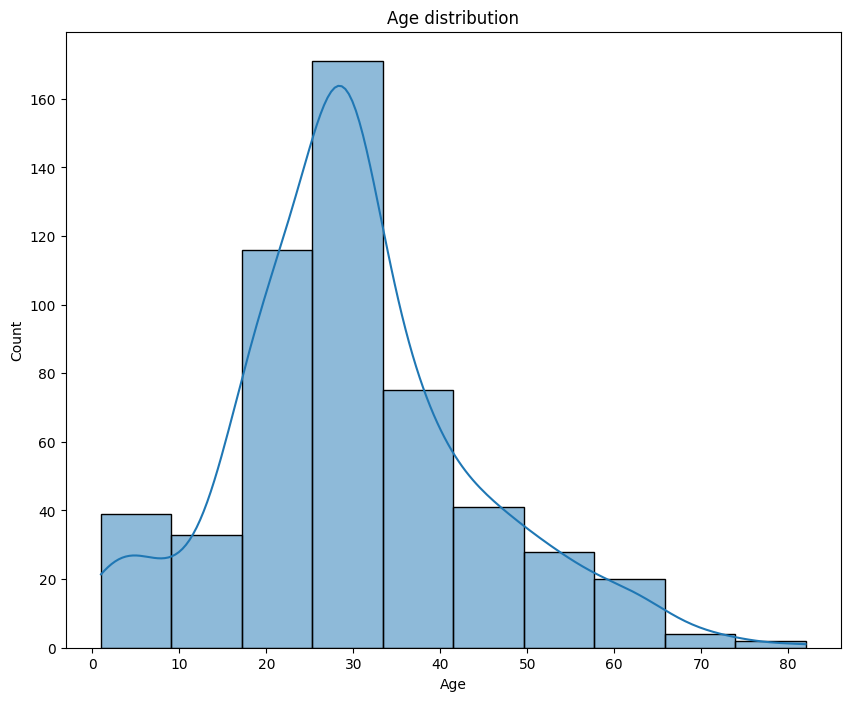

In [176]:
plt.figure(figsize=(10,8))
sns.histplot(df['Age'], bins=10,kde=True)
plt.title('Age distribution')
plt.xlabel('Age')
plt.show()

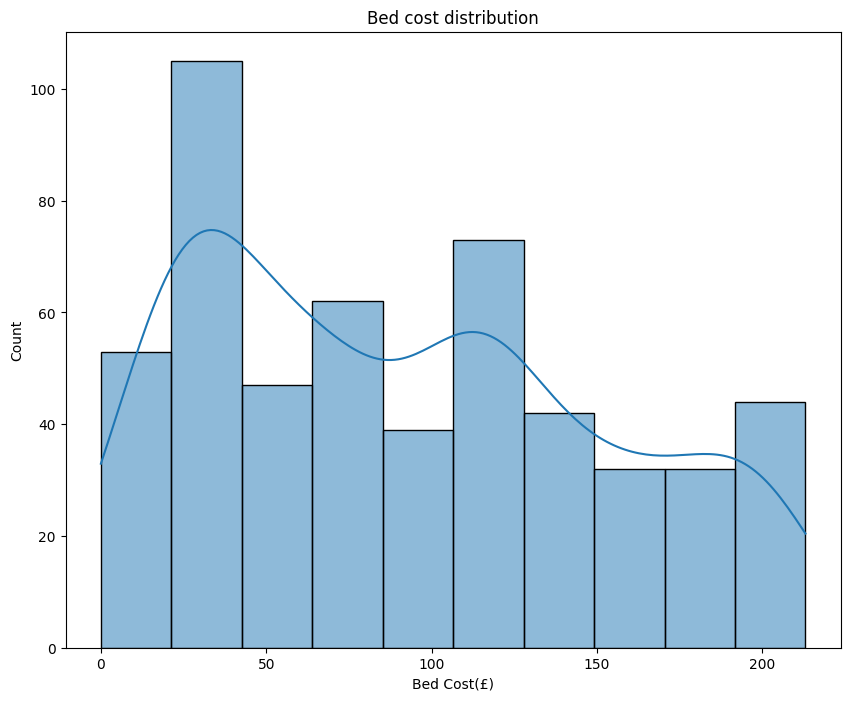

In [177]:
plt.figure(figsize=(10,8))
sns.histplot(df['Bed Cost(£)'], bins=10,kde=True)
plt.title('Bed cost distribution')
plt.xlabel('Bed Cost(£)')
plt.show()

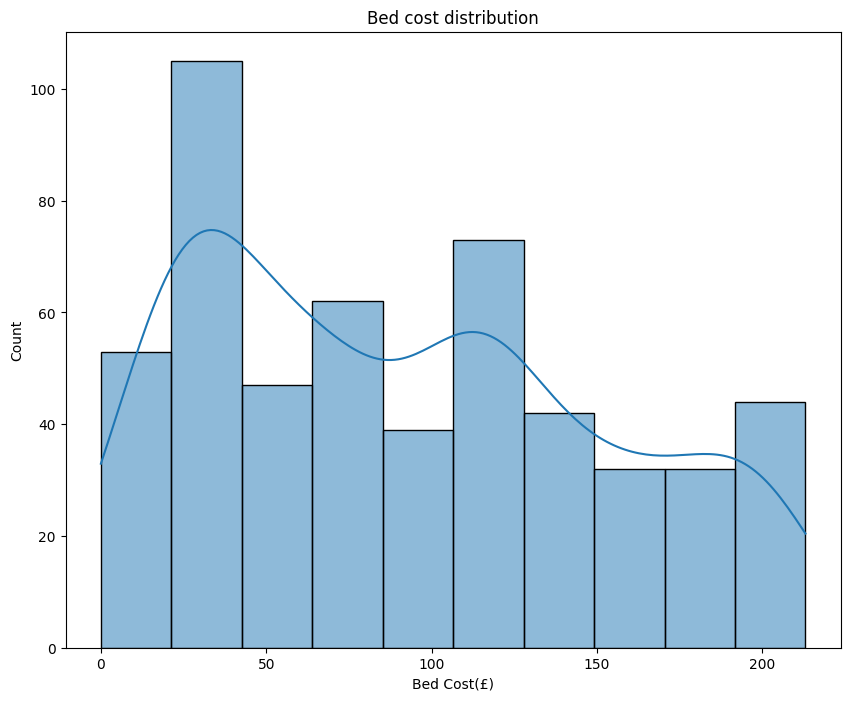

In [177]:
plt.figure(figsize=(10,8))
sns.histplot(df['Bed Cost(£)'], bins=10,kde=True)
plt.title('Bed cost distribution')
plt.xlabel('Bed Cost(£)')
plt.show()

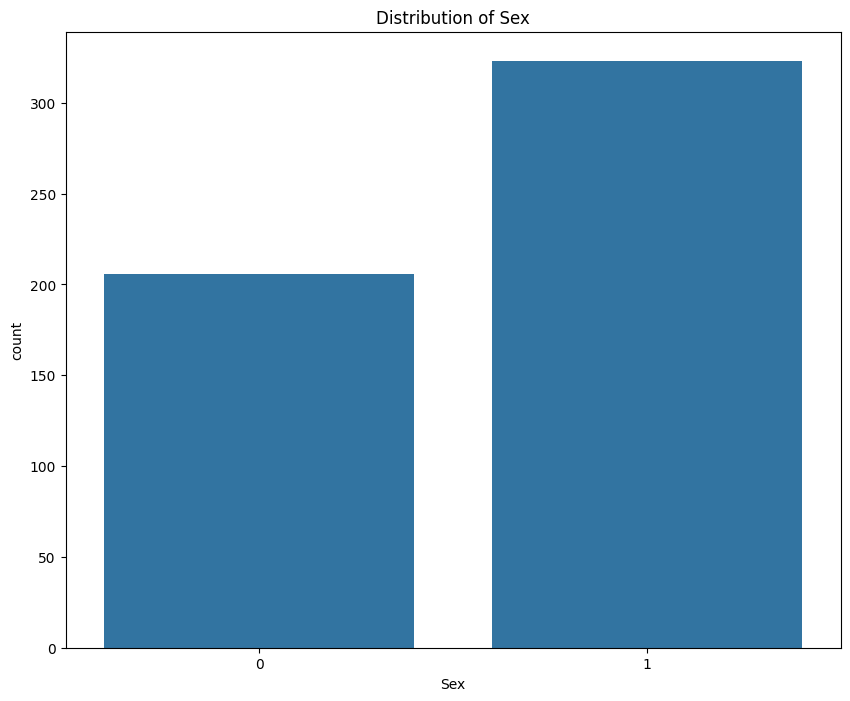

In [178]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Sex')
plt.title('Distribution of Sex')
plt.show()

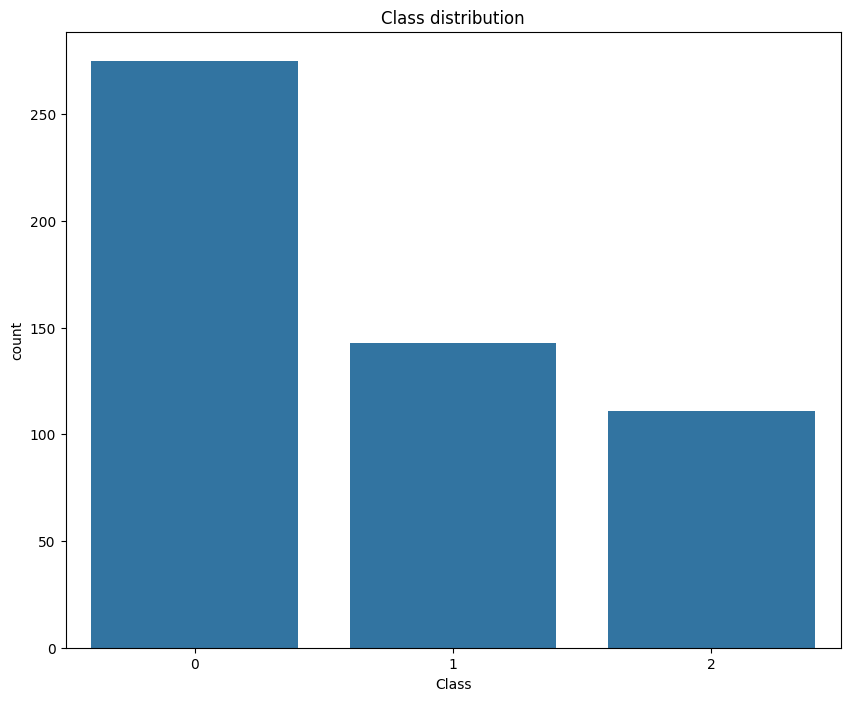

In [179]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Class')
plt.title('Class distribution')
plt.show()

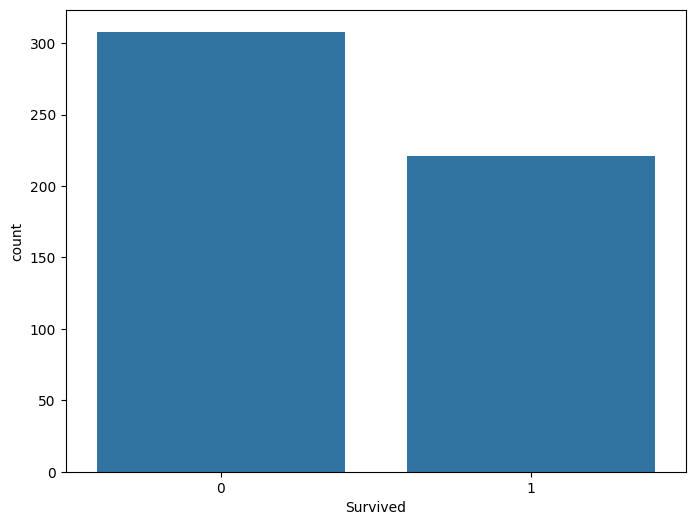

In [180]:
plt.figure(figsize=(8,6))
sns.countplot(x="Survived",data=df)
plt.show()

In [181]:
value_survived = df["Survived"].value_counts(normalize=True)

In [182]:
value_survived

Survived
0    0.582231
1    0.417769
Name: proportion, dtype: float64

In [183]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop("Survived", axis = 1)
y = df["Survived"]

In [184]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [185]:
y_train.value_counts()

Survived
0    241
1    182
Name: count, dtype: int64

In [186]:
X_train.shape

(423, 5)

In [187]:
X_test.shape

(106, 5)

In [188]:
y_train.shape

(423,)

In [189]:
y_test.shape

(106,)

In [190]:
SMOTE_m = SMOTE(random_state = 42)

In [191]:
X_res, y_res = SMOTE_m.fit_resample(X_train,y_train)


In [192]:
y_res.value_counts()

Survived
0    241
1    241
Name: count, dtype: int64

In [206]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
Decision_Tree = DecisionTreeClassifier(random_state=42)
Decision_Tree.fit(X_res, y_res)
y_pred_dt = Decision_Tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Acuracy of Decesion Tree:", accuracy_dt)
print("Classification report of Decesion Tree:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Acuracy of Decesion Tree: 0.660377358490566
Classification report of Decesion Tree:
              precision    recall  f1-score   support

           0       0.75      0.70      0.72        67
           1       0.53      0.59      0.56        39

    accuracy                           0.66       106
   macro avg       0.64      0.65      0.64       106
weighted avg       0.67      0.66      0.66       106

Decision Tree Confusion Matrix:
[[47 20]
 [16 23]]


In [201]:
Random_Forest = RandomForestClassifier(random_state=42, n_estimators=100)
Random_Forest.fit(X_res, y_res)
y_pred_rf =Random_Forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.7547169811320755
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        67
           1       0.67      0.67      0.67        39

    accuracy                           0.75       106
   macro avg       0.74      0.74      0.74       106
weighted avg       0.75      0.75      0.75       106

Random Forest Confusion Matrix:
[[54 13]
 [13 26]]
